# Das Spiel des Lebens - Conway's Game of Life

In dieser Fallstudie werden wir das berühmnte *Game of Life* von John Horton Conway implementieren. Dieses Single-Player-Game simuliert, wie sich eine Population von einfachen Zellen mit der Zeit ausbreitet und sich zu neuen, komplexeren Organismen verbindet. Das Regelwerk des Spiels bestimmt, wann neue lebende Zellen entstehen, und unter welchen Bedingungen Zellen sterben. Die Regeln sind extrem einfach. Das faszinierende an diesem Spiel ist zu beobachten, wie sich aus zufälligen Initialkonfigurationen stabile Muster (Organismen) bilden. Dabei sind der Komplexität kaum Grenzen gesetzt. Faszinierende Beispiele für Interessierte finden sich zum Beispiel auf [dieser Seite](https://beltoforion.de/en/game_of_life/).

Für diese Fallstudie benötigen wir einige Funktionen, welche wir als erstes Importieren müssen. 

In [22]:
from matplotlib.pyplot import *             # Plotten des Spiels
from random import random                   # Generieren von Zufallszahlen
from IPython.display import clear_output    # Steuern der Ausgabe in Jupyter-Notebooks

### Das Spielfeld

Das Spielfeld im Game of Life ist eine (zweidimensionale) Matrix von Feldern. Jedes Feld entspricht dabei einer Zelle. Eine Zelle kann dabei jeweils aktiv oder tot sein. Wir modellieren dieses Spiel mit einer Liste von Listen von Zahlen, wobei die Zahl 1 eine lebendige Zelle definiert und die Zahl 0 eine tote Zelle. 

Zu beginn des Spiels erzeugen wir ein Spielfeld von einer festen Grösse. Jede Zelle wird zufällig mit 0 oder 1 initialisiert, wobei wir die Wahrscheilichkeit eine lebendige Zelle zu erzeugen als Parameter angeben können. 
Um zufällig eine 0 oder 1 zu erzeugen mit einer bestimmten Wahrscheinlichkeit zu erzeugen nutzen wir folgende Funktion:

In [23]:
def randomCell(alive_probability):
    r = random() # gibt eine Zufallszahl zwischen 0 und 1 zurück
    if r < alive_probability:
        return 1
    else:
        return 0

Nun schreiben wir uns eine Funktion, die Spielfeld mit ```m``` Zeilen und ```n``` Spalten erzeugt:


In [24]:
def create_grid(m, n):
    grid = []
    for i in range(0, m):
        row = [0]*m            
        grid.append(row)
    return grid

Ausserdem schreiben wir uns eine Prozedur, welche ein Spielfeld als Argument entgegennimmt, und die Zellen zufällig, gemäss einer angegebenen Wahrscheinlichkeit, setzt. 

In [25]:
def initialize_population(grid, alive_probability):
    for i in range(0, len(grid)):
        for j in range(0, len(grid[0])):
            grid[i][j] = randomCell(alive_probability)

Wir nutzen die Funktion ```create_grid``` zusammen mit der Prozedur ```initialize_population``` um eine Funktion ```initial_grid``` zu implementieren, welche uns ein initiales Spielfeld der Grösse ```m``` mal ```n``` erzeugt und die Zellen zufällig mit der gegebenen Wahrscheinlichkeit initialisiert. 

In [26]:
def initial_grid(m, n, alive_probabability):
    grid = create_grid(m, n)
    initialize_population(grid, alive_probabability)
    return grid

Mit dem Befehl ```imshow``` können wir das Spielfeld visualisieren.

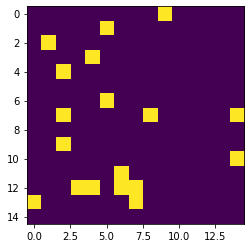

In [27]:
imshow(initial_grid(15, 15, 0.1))

### Entwicklung des Lebens

Wir simulieren im folgenden ```n``` Zeitschritte im Spiel. In jedem Zeitschritt werden die Zellen nach folgenden Regeln aktualisiert:

1. Eine tote Zelle mit genau drei lebenden Nachbarn wird in der Folgegeneration neu geboren.
2. Lebende Zellen mit weniger als zwei lebenden Nachbarn sterben in der Folgegeneration an Einsamkeit.
3. Eine lebende Zelle mit zwei oder drei lebenden Nachbarn bleibt in der Folgegeneration am Leben.
4. Lebende Zellen mit mehr als drei lebenden Nachbarn sterben in der Folgegeneration an Überbevölkerung.

Wir sehen, dass wir für jede Regeln nur an jeder Position die Anzahl Nachbarn einer Zelle wissen müssen. Wir schreiben uns eine Funktion, die genau das macht:

  		

In [28]:
def count_alive_neighbors(grid, i, j):
    neighbors = [
        (i - 1, j - 1), (i, j - 1), (i + 1, j - 1), 
        (i - 1, j ), (i + 1, j ),
        (i - 1, j + 1), (i, j + 1), (i + 1, j + 1)]
    num_alive_neighbors = 0
    for (ni, nj) in neighbors:
        if ni >= 0 and nj >= 0 and ni < len(grid) and nj < len(grid[0]) and grid[ni][nj] == 1:
            num_alive_neighbors = num_alive_neighbors +  1
    return num_alive_neighbors
        

Mit dieser Hilfsfunktion ist es nun einfach einen Zeitschritt in unserem Spiel zu simulieren. Wir iterieren durch alle Zellen und setzen in der nächsten Generation die Zelle nach den oben beschriebenen Regeln auf lebendig oder tot. Wir müssen die neuen Zellen in ein neues Spielfeld schreiben, da wir sonst während dem aktualisieren ja den Spielzustand ändern würden. Das Resultat der Funktion ist ein neues Spielfeld, mit einer neuen Generation von Zellen. 

In [19]:
def next_gen(grid):
    new_grid = create_grid(len(grid), len(grid[0]))
    for i in range(0, len(grid)):
        for j in range(0, len(grid[i])):
            num_alive_neighbors = count_alive_neighbors(grid, i, j)
            if grid[i][j] == 0 and num_alive_neighbors == 3:
                new_grid[i][j] = 1                    
            elif grid[i][j] == 1 and num_alive_neighbors < 2:
                new_grid[i][j] = 0
            elif grid[i][j] == 1 and (num_alive_neighbors == 2 or num_alive_neighbors == 3):
                new_grid[i][j] = 1
            else:
                new_grid[i][j] = 0
    return new_grid
            
          

### Die Simulation

Nun können wir das Spiel simulieren. Wir beginnen mit einem zufälligen Spielfeld und entwickeln dies dann über eine angegebene Anzahl iterationen. In jeder Iteration stellen wir das Resultat grafisch dar. Damit es nicht zu schnell geht, weisen wir Python mit dem Befehl ```thread.sleep(1)``` an jeweils 1 Sekunden Pause zu machen. Der Befehl ```clear_output``` löscht danach die Ausgabe. 

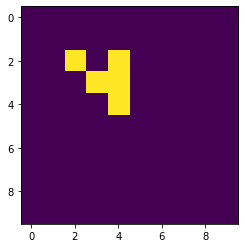

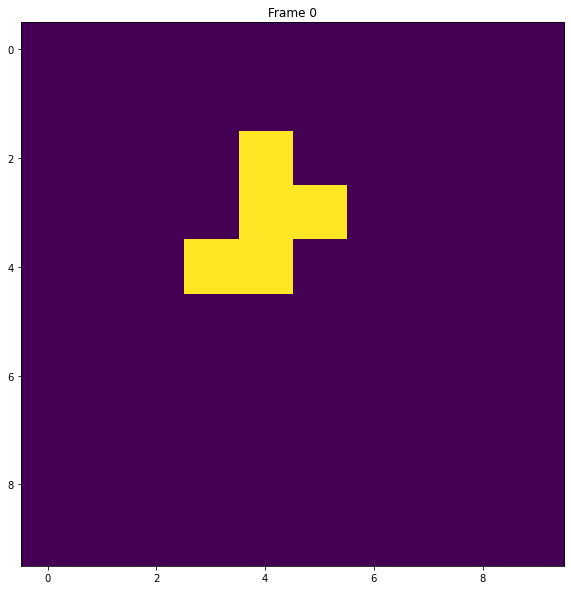

In [34]:
grid = initial_grid(10, 10, 0.0)
grid[2][2] = 1
grid[3][3] = 1
grid[2][4] = 1
grid[3][4] = 1
grid[4][4] = 1
imshow(grid)

for i in range(0, 1):
    grid = next_gen(grid)
    figure(figsize=(10, 10))
    imshow(grid)
    title('Frame %d' % i)
    show()
    time.sleep(1.0)
    clear_output(True)        